# Week 2: Python and Metro

## A quick geopandas teaser
Following our Python bootcamp last week (was it boring? exhilerating? a bit of both?), let's put that programming knowledge into action, using and creating data that reflects a real urban situation.

We start by importing a new module `geopandas`. This is a pretty high level geospatial library, widely used by spatial data scientists all over the world. Don't worry about it too much for now, but know that it allows us to import a variety of spatial data formats, and plot them on a map.

In [2]:
import geopandas as gpd

Next, we import some data. In this case, it is a shapefile I downloaded from the [LA Metro's Developer web portal](https://developer.metro.net/bus-rail-gis-data/).

In [3]:
metro = gpd.read_file('../../data/MetroStations/Stations_All_0715.shp')

In [4]:
# what's the data type?
type(metro)

geopandas.geodataframe.GeoDataFrame

In [5]:
# what does the data look like? 
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


And then we plot it. Don't worry about the intricacies of the syntax just yet (we will learn this in much more detail later), but remember, "command, bracket, arguments!"

<AxesSubplot:>

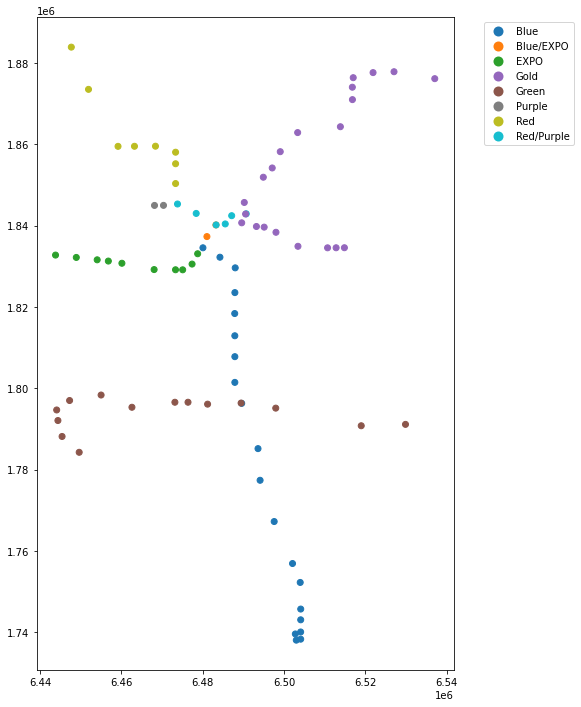

In [6]:
metro.plot(figsize=(20,12),   #size of the plot (a bit bigger than the default)
           column = 'LINE', # column that defines the color of the dots
           legend = True,      # add a legend           
           legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1.3,1)
           } # this puts the legend to the side
          ) 


## Data types revisited

### Let's start with some data

Let's look at some of the variables related to [metro stations in Los Angeles](https://developer.metro.net/) we just downloaded. For each station, a number of pieces of information are given, including the name of the station, the line number (linenum), stop number (stopnum) its latitude (lat), its longitude (long). We can store this information and some additional information for a given station in Python as follows:

In [7]:
station = 'Westwood / Rancho Park'

In [8]:
linenum = 806

In [9]:
stopnum = 80134

In [10]:
lat = 34.0368

In [11]:
long = -118.425

Here we have 5 values assigned to variables related to a single observation station. Each variable has a unique name and they can store different types of data.

### Reminder: Data types and their compatibility

We can explore the different types of data stored in variables using the `type()` function.
Let's use the cells below to check the data types of the variables `station`, `linenum`, and `lat`.

In [12]:
type(station)

str

In [13]:
type(linenum)

int

In [14]:
type(lat)

float

As expected, we see that the `station_name` is a character string, the `station_id` is an integer, and the `station_lat` is a floating point number.

<div class="alert alert-info">

**Note**

Remember, the data types are important because some are not compatible with one another. What happens when you try to add the variables `station` and `linenum` in the cell below?

</div>

Here we get a `TypeError` because Python does not know to combine a string of characters (`station`) with an integer value (`linenum`). Do you remember how to fix it? Use the cell below to print `station` and `linenum` in one line of code.

### Converting data from one type to another

It is not the case that things like the `station` and `linenum` cannot be combined at all, but in order to combine a character string with a number we need to perform a *data type conversion* to make them compatible. Let's convert `linenum` to a character string using the `str()` function. We can store the converted variable as `linenum_str`.

In [15]:
linenum_str = str(linenum)

We can confirm the type has changed by checking the type of `linenum_str`, or by checking the output when you type the name of the variable into a cell and running it.

In [16]:
type(linenum_str)

str

In [17]:
linenum_str

'806'

As you can see, `str()` converts a numerical value into a character string with the same numbers as before.

<div class="alert alert-info">

**Note**

Similar to using `str()` to convert numbers to character strings, `int()` can be used to convert strings or floating point numbers to integers and `float()` can be used to convert strings or integers to floating point numbers.

</div>

### Combining text and numbers

Although most mathematical operations operate on numerical values, a common way to combine character strings is using the addition operator `+`. Let's create a text string in the variable `station_name_and_id` that is the combination of the `station` and `linenum` variables. Once we define `station_name_and_id`, we can print it to the screen to see the result.

In [18]:
station_name_and_id = station + ": " + str(linenum)

In [19]:
print(station_name_and_id)

Westwood / Rancho Park: 806


Note that here we are converting `linenum` to a character string using the `str()` function within the assignment to the variable `station_name_and_id`. Alternatively, we could have simply added `station` and `linenum_str`.

## Lists and indices

Above we have seen a bit of data related to one of the stations on the LA Metro Expo line. Rather than having individual variables for each of those stations, we can store many related values in a *collection*. The simplest type of collection in Python is a **list**.

### Creating a list

Let’s first create a list of selected `station_name` values and print it to the screen.

In [20]:
station_names = ['Pico', 'Culver City', 'Westwood / Rancho Park', 'Downtown Santa Monica']

In [21]:
print(station_names)

['Pico', 'Culver City', 'Westwood / Rancho Park', 'Downtown Santa Monica']


We can also check the type of the `station_names` list using the `type()` function.

In [22]:
type(station_names)

list

Here we have a list of 4 `station_name` values in a list called `station_names`. As you can see, the `type()` function recognizes this as a list. Lists can be created using the square brackets `[` and `]`, with commas separating the values in the list.

### Index values

To access an individual value in the list we need to use an **index value**. An index value is a number that refers to a given position in the list. Let’s check out the first value in our list as an example by printing out `station_names[1]`:

In [23]:
print(station_names[1])

Culver City


Wait, what? This is the second value in the list we’ve created, what is wrong? As it turns out, Python (and many other programming languages) start values stored in collections with the index value `0`. Thus, to get the value for the first item in the list, we must use index `0`. Let's print out the value at index `0` of `station_names` below.

In [24]:
print(station_names[0])

Pico


OK, that makes sense, but it may take some getting used to...

### Number of items in a list

We can find the length of a list using the `len()` function. Use it below to check the length of the `station_names` list.

In [25]:
len(station_names)

4

Just as expected, there are 4 values in our list and `len(station_names)` returns a value of `4`.

### Index value tips

If we know the length of the list, we can now use it to find the value of the last item in the list, right? What happens if you print the value from the `station_names` list at index `4`, the value of the length of the list?

In [26]:
print(station_names[4])

IndexError: list index out of range

An `IndexError`? That’s right, since our list starts with index `0` and has 4 values, the index of the last item in the list is `len(station_names) - 1`. That isn’t ideal, but fortunately there’s a nice trick in Python to find the last item in a list. Let's first print the `station_names` list to remind us of the values that are in it.

In [27]:
print(station_names)

['Pico', 'Culver City', 'Westwood / Rancho Park', 'Downtown Santa Monica']


To find the value at the end of the list, we can print the value at index `-1`. To go further up the list in reverse, we can simply use larger negative numbers, such as index `-4`. Let's print out the values at these indices below.

In [28]:
print(station_names[-1])

Downtown Santa Monica


In [29]:
print(station_names[-4])

Pico


Yes, in Python you can go backwards through lists by using negative index values. Index `-1` gives the last value in the list and index `-len(station_names)` would give the first. Of course, you still need to keep the index values within their ranges. What happens if you check the value at index `-5`?

In [30]:
print(station_names[-5])

IndexError: list index out of range

### Modifying list values

Another nice feature of lists is that they are *mutable*, meaning that the values in a list that has been defined can be modified. Consider a list of the observation station types corresponding to the station names in the `station_names` list.

Let's change the value for `station_names[1]` to be `'Palms'` and print out the `station_names` list again.

In [31]:
station_names[1] = 'Palms'
print(station_names)

['Pico', 'Palms', 'Westwood / Rancho Park', 'Downtown Santa Monica']


### Data types in lists

Lists can also store more than one type of data. Let’s consider that in addition to having a list of each station name, FMISID, latitude, etc. we would like to have a list of all of the values for station ‘Helsinki Kaivopuisto’.

In [32]:
station_westwood_rancho = [station, linenum, lat, long, linenum]
print(station_westwood_rancho)

['Westwood / Rancho Park', 806, 34.0368, -118.425, 806]


Here we have one list with 3 different types of data in it. We can confirm this using the `type()` function. Let's check the type of `station_hel_kaivo`, then the types of the values at indices `0-2` in the cells below.

In [33]:
type(station_westwood_rancho)

list

In [34]:
type(station_westwood_rancho[0])    # The station name

str

In [35]:
type(station_westwood_rancho[1])    # The FMISID

int

In [36]:
type(station_westwood_rancho[2])    # The station latitude

float

### Adding and removing values from lists

Finally, we can add and remove values from lists to change their lengths. Let’s consider that we no longer want to include the first value in the `station_names` list. Since we haven't see that list in a bit, let's first print it to the screen.

In [37]:
print(station_names)

['Pico', 'Palms', 'Westwood / Rancho Park', 'Downtown Santa Monica']


`del` allows values in lists to be removed. It can also be used to delete values from memory in Python. To remove the first value from the `station_names` list, we can simply type `del station_names[0]`. If you then print out the `station_names` list, you should see the first value has been removed.

In [38]:
del station_names[0]

In [39]:
print(station_names)

['Palms', 'Westwood / Rancho Park', 'Downtown Santa Monica']


If we would instead like to add a few samples to the `station_names` list, we can type `station_names.append('List item to add')`, where `'List item to add'` would be the text that would be added to the list in this example. Let's add two values to our list in the cells below: `'Pico'` and `'Farmdale'`. After doing this, let's check the list contents by printing to the screen.

In [40]:
station_names.append('Pico')
station_names.append('Farmdale')

In [41]:
print(station_names)

['Palms', 'Westwood / Rancho Park', 'Downtown Santa Monica', 'Pico', 'Farmdale']


As you can see, we add values one at a time using `station_names.append()`. `list.append()` is called a method in Python, which is a function that works for a given data type (a list in this case). We’ll see some other examples of useful list mtehods below.

### Appending to an integer? Not so fast...

Let’s consider our list `station_names`. As we know, we already have data in the list `station_names`, and we can modify that data using built-in methods such as `station_names.append()`. In this case, the method `append()` is something that exists for lists, but not for other data types. It is intuitive that you might like to add (or append) things to a list, but perhaps it does not make sense to append to other data types. Below, let's create a variable `station_name_length` that we can use to store the length of the list `station_names`. We can then print the value of `station_name_length` to confirm the length is correct.

In [42]:
station_name_length = len(station_names)

In [43]:
print(station_name_length)

5


If we check the data type of `station_name_length`, we can see it is an integer value, as expected (do that below). What happens if you try to append the value `1` to `station_name_length`?

In [44]:
type(station_name_length)

int

In [45]:
station_name_length.append(1)

AttributeError: 'int' object has no attribute 'append'

Here we get an `AttributeError` because there is no method built in to the `int` data type to append to `int` data. While `append()` makes sense for `list` data, it is not sensible for `int` data, which is the reason no such method exists for `int` data.

### Some other useful list methods

With lists we can do a number of useful things, such as count the number of times a value occurs in a list or where it occurs. The `list.count()` method can be used to find the number of instances of an item in a list. For instance, we can check to see how many times `'Palms'` occurs in our list `station_names` by typing `station_names.count('Palms')`.

In [46]:
station_names.count('Palms')    # The count method counts the number of occurences of a value

1

Similarly, we can use the `list.index()` method to find the index value of a given item in a list. Let's use the cell below to find the index of `'Palms'` in the `station_names` list.

In [47]:
station_names.index('Palms')    # The index method gives the index value of an item in a list

0

The good news here is that our selected station name is only in the list once. Should we need to modify it for some reason, we also now know where it is in the list (index `0`).

### Reversing a list

There are two other common methods for lists that we need to see. First, there is the `list.reverse()` method, used to reverse the order of items in a list. Let's reverse our `station_names` list below and then print the results.

In [48]:
station_names.reverse()

In [49]:
print(station_names)

['Farmdale', 'Pico', 'Downtown Santa Monica', 'Westwood / Rancho Park', 'Palms']


Yay, it works!

<div class="alert alert-warning">

**Caution**

A common mistake when sorting lists is to do something like `station_names = station_names.reverse()`. **Do not do this!** When reversing lists with `.reverse()` the `None` value is returned (this is why there is no screen ouput when running `station_names.reverse()`). If you then assign the output of `station_names.reverse()` to `station_names` you will reverse the list, but then overwrite its contents with the returned value `None`. This means you’ve deleted the contents of your list (!).

</div>

### Sorting a list

The `list.sort()` method works the same way. Let's sort our `station_names` list and print its contents below.

In [50]:
station_names.sort()   # Notice no output here...

In [51]:
print(station_names)

['Downtown Santa Monica', 'Farmdale', 'Palms', 'Pico', 'Westwood / Rancho Park']


As you can see, the list has been sorted alphabetically using the `list.sort()` method, but there is no screen output when this occurs. Again, if you were to assign that output to `station_names` the list would get sorted, but the contents would then be assigned `None`.

### Looping
Loops in Python let us iterate over a list. It can come in handy when we are dealing with lots of data, and we want to do something to each row in the data.

Pay close attention to the syntax in a `for` loop. Notice the semi-colon at the end of the `for` statement, and the indentation that follows.

In [52]:
# loop through a list
for station in station_names:
    print(station)

Downtown Santa Monica
Farmdale
Palms
Pico
Westwood / Rancho Park


Now let's do something to each element of our list. For example, we can add some text to each element:

In [53]:
for station in station_names:
    print('Expo line station: ' + station)

Expo line station: Downtown Santa Monica
Expo line station: Farmdale
Expo line station: Palms
Expo line station: Pico
Expo line station: Westwood / Rancho Park


In [54]:
# enumerate lets you loop though a list and count along
for count, station in enumerate(station_names):
    print(count, station)

0 Downtown Santa Monica
1 Farmdale
2 Palms
3 Pico
4 Westwood / Rancho Park


## Back to mapping
We can't finish our lesson without a map :). Let's go back to the original metro dataset that was the inspiration for this notebook. Recall that we used the module `geopandas` to define the data.

In [55]:
metro.head()

,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (6503030.095 1738033.828)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (6502796.262 1739558.050)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (6504114.567 1743039.068)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (6504120.152 1745681.179)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (6503995.170 1752228.119)


In [56]:
# what is the projection?
metro.crs

<Projected CRS: PROJCS["NAD83(HARN) / California zone 5 (ftUS)",GE ...>
Name: NAD83(HARN) / California zone 5 (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: NAD83 (High Accuracy Reference Network)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [57]:
# let's reproject it
metro_gcs = metro.to_crs("EPSG:4326")

In [58]:
type(metro_gcs.geometry)

geopandas.geoseries.GeoSeries

Now it's time for another module. Everybody, please welcome `folium`. Folium brings leaflet, an open source javascript mapping library into our Python environment, allowing you to create instant interactive maps. Try it:

<AxesSubplot:>

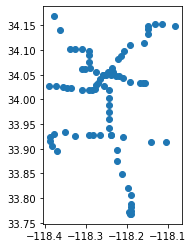

In [59]:
metro_gcs.plot()

In [60]:
# Load an empty map
from keplergl import KeplerGl 
map_1 = KeplerGl(height=500)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=500)

In [61]:
map_1.add_data(data = metro_gcs)